# MinION Taxonomy Data

This is the "revised revised" data which is the same format as the MGI data. This means we can reuse this exact notebook for that analysis, and they should be comparable!

In [27]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd
import seaborn as sns
import json

## Read the data

We read the data, and limit only to Bacteria. We analyse the viruses separately, and we choose to eliminate the Archaea and Eukarya since they are very minor components of the data. We also log the data.

In [76]:
df = pd.read_csv("../MinION/Taxonomy/Minion_read_based_annotations_genus.normalised.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('g__')]
df = df.set_index('taxonomy')

epsilon = 1e-10
log_df = np.log(df + epsilon)/np.log(10)
df['row sum'] = df.sum(axis=1)
log_df['row sum'] = log_df.sum(axis=1)
log_df['row sum'].sort_values(ascending=False)

taxonomy
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus                         312.199203
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella                         242.407044
k__Bacteria;p__Bacillota;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella                       199.531552
k__Bacteria;p__Bacillota;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus                                        182.931664
k__Bacteria;p__Actinomycetota;c__Actinomycetes;o__Micrococcales;f__Micrococcaceae;g__Rothia                         163.574482
                                                                                                                       ...    
k__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Thiotrichales;f__Piscirickettsiaceae;g__Thiomicrorhabdus   -589.349887
k__Bacteria;p__Bacteroidota;c__Cytophagia;o__Cytophagales;f__Cytophagaceae;g__Rhodocytophaga          

Here, we filter the log-normalised data so that the row sums are >0 (ie. there are 10 or more normalised reads in the row sum). We also sort by the index and the columns.

In [79]:
log_df = log_df[log_df['row sum'] > 0]
log_df.index = log_df.index.str.replace('g__', '').str.split(';').str[-1]

# sort by the index
log_df = log_df.sort_index()
# sort by the column labels
log_df = log_df.sort_index(axis=1)



### plot the 

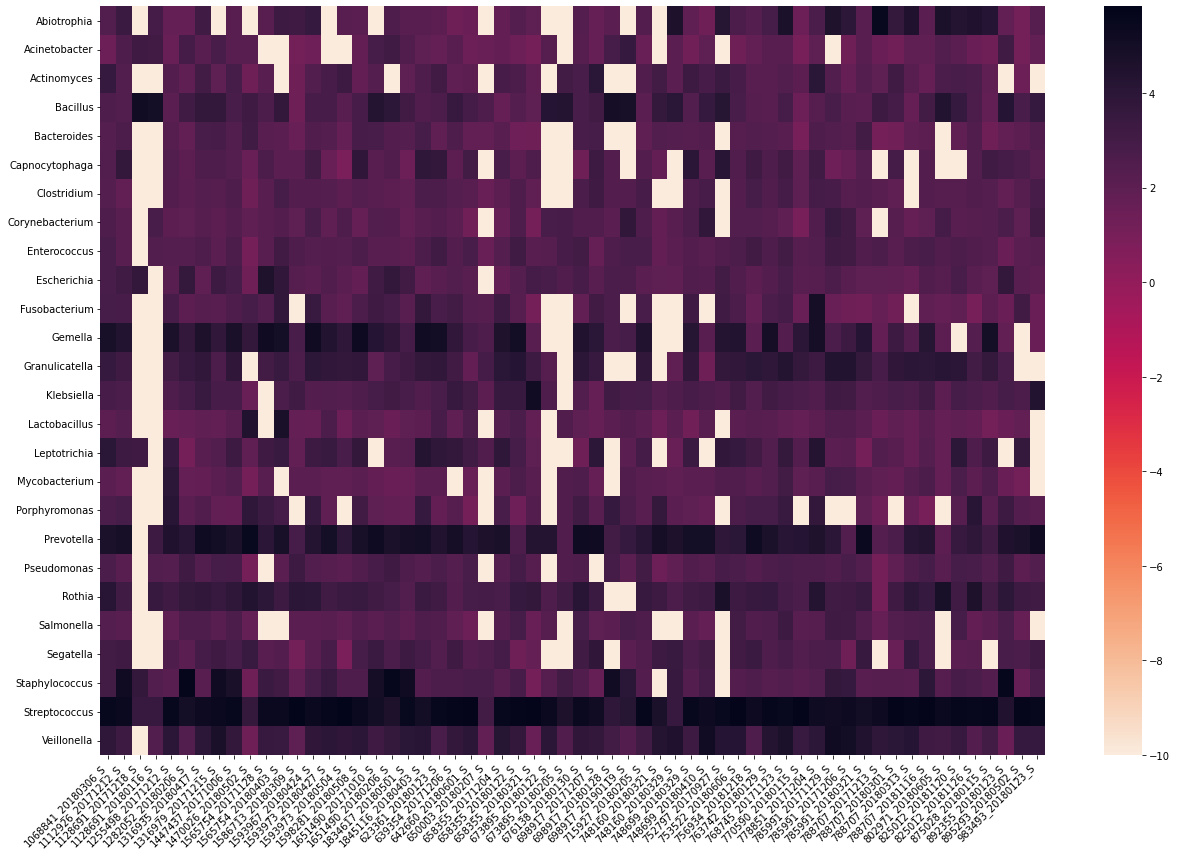

In [78]:
fig, ax = plt.subplots(figsize=(18, 12))
g = sns.heatmap(data=log_df.iloc[:, :-1], ax=ax, cmap="rocket_r")
g.set_xlabel("")
g.set_ylabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('minion_taxonomy_heatmap.png')

In [14]:

df['row sum'].sort_values(ascending=False)

taxonomy
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus     3.345536e+07
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__;g__                                  1.085806e+07
k__Bacteria;p__Bacillota;c__;o__;f__;g__                                                        8.462652e+06
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella     6.764465e+06
k__Bacteria;p__Bacillota;c__Bacilli;o__;f__;g__                                                 6.091203e+06
                                                                                                    ...     
k__Eukaryota;p__Nematoda;c__Chromadorea;o__Rhabditida;f__Aphelenchoididae;g__Bursaphelenchus    8.935991e+00
k__Eukaryota;p__Nematoda;c__Chromadorea;o__Rhabditida;f__Neodiplogasteridae;g__Pristionchus     8.935991e+00
k__Bacteria;p__Bacillota;c__Bacilli;o__Bacillales;f__Paenibacillaceae;g__Longirhabdus           8.935991e+00
k__Eukaryo

<Axes: xlabel='row sum', ylabel='Density'>

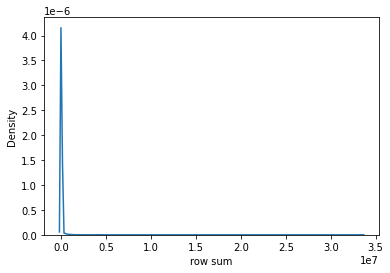

In [15]:
sns.kdeplot(df['row sum'], bw_adjust=0.5)

,825012_20181120_S,698917_20171207_S,1586713_20180309_S,748160_20180321_S,1593973_20180504_S,1316979_20171215_S,756934_20181218_S,983493_20180123_S,892355_20180123_S,1651490_20171010_S,...,1565754_20180403_S,639354_20171206_S,1593973_20180427_S,788707_20171213_S,1316935_20180417_S,1565754_20171128_S,785991_20180321_S,658355_20171204_S,748699_20180410_S,row sum
taxonomy,,,,,,,,,,,,,,,,,,,,,
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,434026.687598,127868.254185,680910.145889,51988.984088,634785.110536,239083.185141,212304.907151,360904.684976,28776.216369,119895.319822,...,220451.874102,449853.297614,412167.886022,201133.517859,196386.946387,277793.946449,118614.781385,358965.679637,198255.727277,3.345536e+07
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__;g__,175196.232339,39505.497012,89660.698497,13157.894737,108778.314321,31937.633597,162725.951120,54101.597559,17230.421580,19901.405879,...,109050.541988,29263.936727,94262.610705,126460.332866,86635.586636,23137.369034,60893.311342,120121.269206,33518.859017,1.085806e+07
k__Bacteria;p__Bacillota;c__;o__;f__;g__,101059.654631,73399.936134,84935.897436,36505.507956,108957.162075,59348.673457,70644.869298,81672.949201,36296.871690,30734.587061,...,90244.220974,32963.388187,83827.493261,89758.797944,65613.398947,45547.147846,55449.827512,85477.129570,76206.331064,8.462652e+06
k__Bacteria;p__Bacillota;c__Bacilli;o__;f__;g__,92268.445840,21166.917568,67183.355438,6762.545900,54960.692374,51966.014622,61263.954796,44947.047209,62919.285361,28604.467166,...,59161.551521,19160.607220,49865.229111,56915.537343,39519.122852,83381.839348,20583.739631,69332.430682,26685.881827,6.091203e+06
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Abiotrophia,20996.860283,45.618357,1671.640141,0.000000,147.743797,0.000000,205.721809,179.500987,70.616482,0.000000,...,1958.991772,25.513458,0.000000,326647.255473,1446.084779,145.518044,144.998459,58.868547,24.847190,1.302741e+06
k__Bacteria;p__;c__;o__;f__;g__,18367.346939,11815.154418,14519.783378,24602.203182,8234.772669,13867.183992,14907.973777,10985.460420,5931.784478,8946.503560,...,13451.743503,7756.091338,9510.974201,11335.178595,15626.348960,73632.130384,11871.748863,9257.078943,24027.232520,1.727739e+06
k__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__,15306.122449,4835.545824,24079.907162,3090.575275,4626.713634,6897.666649,12288.449406,11200.861605,776.781301,4016.797517,...,10186.757216,4184.207169,9433.962264,4049.989815,7597.340931,87165.308498,3202.049312,14540.530994,9640.709636,1.232266e+06
k__Eukaryota;p__;c__;o__;f__;g__,11106.750392,4014.415401,386.825818,27111.383109,653.183101,6143.234359,822.887237,18883.503859,35626.015112,42997.991601,...,27948.282617,10792.192882,1848.286484,4433.420804,6129.672796,1600.698487,326.246534,338.494143,12771.455548,4.356411e+06
k__Bacteria;p__Bacillota;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus,3532.182104,1231.695634,27.630416,4559.363525,139.967807,5227.138007,178.292235,4020.822115,18501.518254,21909.804638,...,4701.580253,3495.343794,654.601463,1833.279413,5244.755245,436.554133,126.873652,44.151410,3776.772847,1.140114e+06
